In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [107]:
df = pd.read_csv("../../data/census_epa_theil_cleaned.csv")
df.columns

Index(['ID', 'NAME', 'STATE_NAME', 'ST_ABBREV', 'CNTY_NAME', 'REGION',
       'AREALAND', 'pop_tot', 'pop_white_only', 'pop_black', 'pop_asian',
       'pop_hispanic_latino_any', 'industry_tot', 'industry_ag_for',
       'industry_const', 'industry_manu', 'industry_transp', 'pop_density',
       'poverty_pct', 'income_median', 'health_ins_tot', 'health_ins_yes',
       'health_ins_no', 'PM25', 'OZONE', 'DSLPM', 'PTRAF', 'PRE1960PCT',
       'PNPL', 'PRMP', 'PTSDF', 'UST', 'PWDIS', 'pct_pop_white_only',
       'pct_pop_black', 'pct_pop_asian', 'pct_pop_hispanic_latino_any',
       'prim_ind_share', 'sec_ind_share', 'health_ins_pct',
       'theil_income_median'],
      dtype='object')

In [108]:
df = df[['pct_pop_white_only', 'pct_pop_black', 'pct_pop_asian', 'pct_pop_hispanic_latino_any',
        'pop_density', 'prim_ind_share', 'sec_ind_share', 'poverty_pct', 'theil_income_median', 'health_ins_pct',
        'PM25', 'OZONE', 'DSLPM', 'PTRAF', 'PRE1960PCT', 'PNPL', 'PRMP', 'PTSDF', 'UST', 'PWDIS']]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80151 entries, 0 to 80150
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pct_pop_white_only           80151 non-null  float64
 1   pct_pop_black                80151 non-null  float64
 2   pct_pop_asian                80151 non-null  float64
 3   pct_pop_hispanic_latino_any  80151 non-null  float64
 4   pop_density                  80151 non-null  float64
 5   prim_ind_share               80151 non-null  float64
 6   sec_ind_share                80151 non-null  float64
 7   poverty_pct                  80151 non-null  float64
 8   theil_income_median          80151 non-null  float64
 9   health_ins_pct               80151 non-null  float64
 10  PM25                         80151 non-null  float64
 11  OZONE                        80151 non-null  float64
 12  DSLPM                        80151 non-null  float64
 13  PTRAF           

In [109]:
df.head()

,pct_pop_white_only,pct_pop_black,pct_pop_asian,pct_pop_hispanic_latino_any,pop_density,prim_ind_share,sec_ind_share,poverty_pct,theil_income_median,health_ins_pct,PM25,OZONE,DSLPM,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,UST,PWDIS
0,83.863763,11.111111,2.400893,1.563372,182.284436,0.111669,4.969291,15.4,3.244928e-06,90.954774,9.693224,59.94949,0.161449,12.358415,0.289474,0.066498,0.077498,0.062147,0.330720,0.086036
1,39.054726,58.457711,2.736318,0.497512,605.272556,0.000000,6.746712,6.6,4.435235e-06,93.024585,9.722213,60.02012,0.176942,65.510247,0.294511,0.072671,0.082691,0.067863,2.208384,0.097622
2,68.017892,30.891809,3.634330,0.363433,668.689248,0.000000,7.450098,17.2,1.944627e-06,96.232780,9.743874,59.90393,0.204497,46.665740,0.087077,0.075500,0.082142,0.071178,1.830997,0.001432
3,89.689637,7.048922,0.920568,0.736454,595.525072,0.079051,11.646904,8.1,7.687476e-07,95.177866,9.766758,59.95221,0.242509,144.572390,0.081486,0.084302,0.087589,0.079793,2.958719,0.000062
4,75.850262,22.939968,0.639123,2.168455,706.196703,0.000000,3.865074,18.0,2.502762e-06,96.439447,9.781263,59.92819,0.261567,73.784886,0.005914,0.106715,0.103047,0.100418,3.004055,0.017290


In [110]:
# clssifying PM25 with >9 as 1 else 0
df['PM25'] = np.where(df['PM25'] > 9, 1, 0)
df.head()

,pct_pop_white_only,pct_pop_black,pct_pop_asian,pct_pop_hispanic_latino_any,pop_density,prim_ind_share,sec_ind_share,poverty_pct,theil_income_median,health_ins_pct,PM25,OZONE,DSLPM,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,UST,PWDIS
0,83.863763,11.111111,2.400893,1.563372,182.284436,0.111669,4.969291,15.4,3.244928e-06,90.954774,1,59.94949,0.161449,12.358415,0.289474,0.066498,0.077498,0.062147,0.330720,0.086036
1,39.054726,58.457711,2.736318,0.497512,605.272556,0.000000,6.746712,6.6,4.435235e-06,93.024585,1,60.02012,0.176942,65.510247,0.294511,0.072671,0.082691,0.067863,2.208384,0.097622
2,68.017892,30.891809,3.634330,0.363433,668.689248,0.000000,7.450098,17.2,1.944627e-06,96.232780,1,59.90393,0.204497,46.665740,0.087077,0.075500,0.082142,0.071178,1.830997,0.001432
3,89.689637,7.048922,0.920568,0.736454,595.525072,0.079051,11.646904,8.1,7.687476e-07,95.177866,1,59.95221,0.242509,144.572390,0.081486,0.084302,0.087589,0.079793,2.958719,0.000062
4,75.850262,22.939968,0.639123,2.168455,706.196703,0.000000,3.865074,18.0,2.502762e-06,96.439447,1,59.92819,0.261567,73.784886,0.005914,0.106715,0.103047,0.100418,3.004055,0.017290


In [111]:
# urban cutoff
urbal_df = df[df['pop_density'] >= 500]
urbal_df.shape

(48660, 20)

In [112]:
# split dependent and independent variables
X = urbal_df.drop(['PM25'], axis=1)
y = urbal_df['PM25']

In [113]:
X.shape, y.shape

((48660, 19), (48660,))

In [114]:
y.value_counts()

PM25
0    32194
1    16466
Name: count, dtype: int64

### Split the data into training and test sets

In [115]:
X_train , X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [116]:
print("Size of train input : " + str(X_train.shape))
print("Size of test input : " + str(X_test.shape))
print("Length of train output : " + str(len(y_train)))
print("Length of test output : " + str(len(y_test)))

Size of train input : (36495, 19)
Size of test input : (12165, 19)
Length of train output : 36495
Length of test output : 12165


In [117]:
# use min max scaling for train and test input data
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)

### Create the AdaBoost classification model

In [118]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=50, algorithm='SAMME.R', learning_rate=0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.5)

In [119]:
# feature importanace score
for name, score in zip(X.columns, ada_clf.feature_importances_):
    print(name, score)

pct_pop_white_only 0.03978793037338989
pct_pop_black 0.009912344178661252
pct_pop_asian 0.0220939715324162
pct_pop_hispanic_latino_any 0.07583931251680866
pop_density 0.025196079411459644
prim_ind_share 0.020367173128435424
sec_ind_share 0.030736352332041746
poverty_pct 0.0
theil_income_median 0.0075889084435368445
health_ins_pct 0.05765753289135105
OZONE 0.20218591703300015
DSLPM 0.08690538758596038
PTRAF 0.028653635818635843
PRE1960PCT 0.04554649004489393
PNPL 0.12527635057652653
PRMP 0.0699139271351869
PTSDF 0.0945417544335701
UST 0.03658512210926292
PWDIS 0.0212118104548625


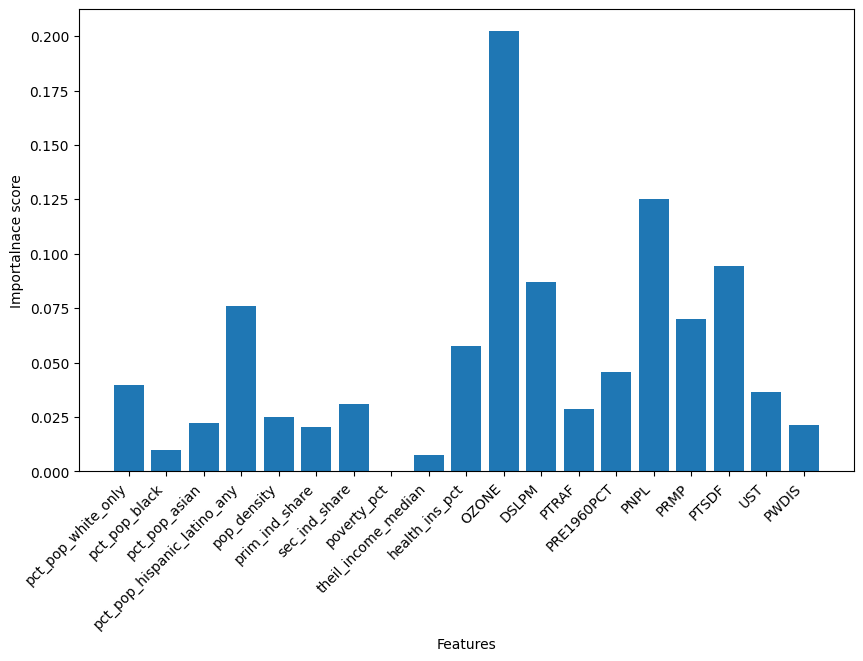

In [120]:
plt.figure(figsize=(10, 6))
plt.bar(X.columns, ada_clf.feature_importances_)
plt.xlabel("Features")
plt.ylabel("Importalnace score")
plt.xticks(rotation=45, ha='right')
plt.show()

In [121]:
# looks like ozone has highest impact on PM25

### Make predictions

In [122]:
prediction = ada_clf.predict(X_test)
prediction.shape

(12165,)

### Evaluate the model

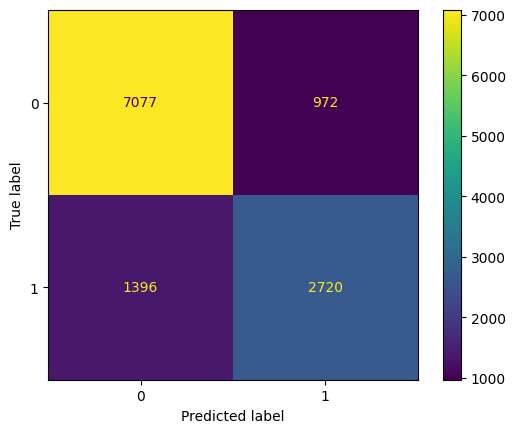

In [123]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [124]:
print('Accuracy score', accuracy_score(y_test, prediction))

Accuracy score 0.8053431976983149


In [125]:
print("Classification Report : \n")
print(classification_report(y_test, prediction))

Classification Report : 

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      8049
           1       0.74      0.66      0.70      4116

    accuracy                           0.81     12165
   macro avg       0.79      0.77      0.78     12165
weighted avg       0.80      0.81      0.80     12165



In [126]:
print("Precision : " + str(precision_score(y_test, prediction)))
print("Recall : " + str(recall_score(y_test, prediction)))
print("F1 score : " + str(f1_score(y_test, prediction)))

Precision : 0.7367280606717227
Recall : 0.6608357628765792
F1 score : 0.6967213114754098


### Tune the AdaBoost hyperparameters

In [127]:
ada_clf.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': 2,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(max_depth=2),
 'learning_rate': 0.5,
 'n_estimators': 50,
 'random_state': None}

In [133]:
# Using Grid search to find best parameters

gs_param_grid = [{
    # 'estimator': [
    #     DecisionTreeClassifier(max_depth=2, random_state=42),
    #     DecisionTreeClassifier(max_depth=3, random_state=42),
    #     DecisionTreeClassifier(max_depth=4, random_state=42),
    #     DecisionTreeClassifier(max_depth=5, random_state=42),
    # ]
    'n_estimators': [50, 100, 200], 
}]

In [135]:
grid_search = GridSearchCV(ada_clf, gs_param_grid, cv=5, scoring='f1', return_train_score=True, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                                          learning_rate=0.5),
             param_grid=[{'n_estimators': [50, 100, 200]}],
             return_train_score=True, scoring='f1', verbose=1)

In [136]:
grid_search.best_params_

{'n_estimators': 200}

In [137]:
grid_search.best_score_

0.7550570125336593

In [140]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
f1_score_test = f1_score(y_test, y_pred)
print("f1 on test: ", f1_score_test)

f1 on test:  0.7466155810983397
